# 1. Importing Libraries

In [23]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

# 2. Read the Training Data

In [15]:
file_path = r"C:\Users\HP\Desktop\Flight Price Prediction\Data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-03-27,Delhi,Cochin,08:55:00,15:30:00,395,1.0,No Info,7845
1,Multiple Carriers,2019-05-27,Delhi,Cochin,08:00:00,19:15:00,675,1.0,In-flight meal not included,11761
2,Jet Airways,2019-04-01,Kolkata,Banglore,20:00:00,23:35:00,1655,1.0,No Info,12681
3,Jet Airways,2019-03-06,Banglore,New Delhi,08:55:00,09:30:00,1475,1.0,No Info,17261
4,Jet Airways,2019-05-21,Kolkata,Banglore,10:20:00,17:35:00,435,1.0,In-flight meal not included,5608
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-06-12,Delhi,Cochin,09:00:00,19:00:00,600,1.0,In-flight meal not included,10262
636,Jet Airways,2019-03-06,Banglore,New Delhi,14:05:00,21:20:00,435,1.0,No Info,19225
637,Multiple Carriers,2019-06-03,Delhi,Cochin,10:35:00,19:00:00,505,1.0,No Info,10877
638,Air India,2019-03-03,Delhi,Cochin,05:55:00,07:40:00,1545,2.0,No Info,15428


In [16]:
# 2.1 Fixing Data Types
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [17]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 3. High-level Summary of Data

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [19]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,615.914062,0.781250,9081.103125
std,495.119910,0.670616,4320.698081
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5278.500000
50%,502.500000,1.000000,8538.000000
75%,900.000000,1.000000,12580.000000
max,2300.000000,3.000000,31825.000000


In [20]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,234,250,250,334.0,514


# 4. High-level analysis of Missing Values

In [21]:

eda_helper_functions.missing_info(train)

,count,percentage
variable,,


# 5. High-level analysis of Outliers

In [24]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [25]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
2,Jet Airways,2019-04-01,Kolkata,Banglore,2025-07-07 20:00:00,2025-07-07 23:35:00,1655,1.0,No Info,12681,-1
3,Jet Airways,2019-03-06,Banglore,New Delhi,2025-07-07 08:55:00,2025-07-07 09:30:00,1475,1.0,No Info,17261,-1
9,Spicejet,2019-04-01,Kolkata,Banglore,2025-07-07 09:00:00,2025-07-07 11:25:00,145,0.0,No check-in baggage included,3841,-1
10,Jet Airways,2019-06-06,Mumbai,Hyderabad,2025-07-07 02:55:00,2025-07-07 04:20:00,85,0.0,In-flight meal not included,4050,-1
11,Jet Airways,2019-06-12,Delhi,Cochin,2025-07-07 05:30:00,2025-07-07 04:25:00,1375,2.0,No Info,13014,-1
...,...,...,...,...,...,...,...,...,...,...,...
624,Indigo,2019-04-03,Delhi,Cochin,2025-07-07 05:35:00,2025-07-07 08:50:00,195,0.0,No Info,4729,-1
626,Jet Airways,2019-06-06,Mumbai,Hyderabad,2025-07-07 02:55:00,2025-07-07 04:20:00,85,0.0,No Info,5678,-1
633,Indigo,2019-03-01,Mumbai,Hyderabad,2025-07-07 21:20:00,2025-07-07 22:45:00,85,0.0,No Info,12475,-1
638,Air India,2019-03-03,Delhi,Cochin,2025-07-07 05:55:00,2025-07-07 07:40:00,1545,2.0,No Info,15428,-1


# 6. Pair Plots

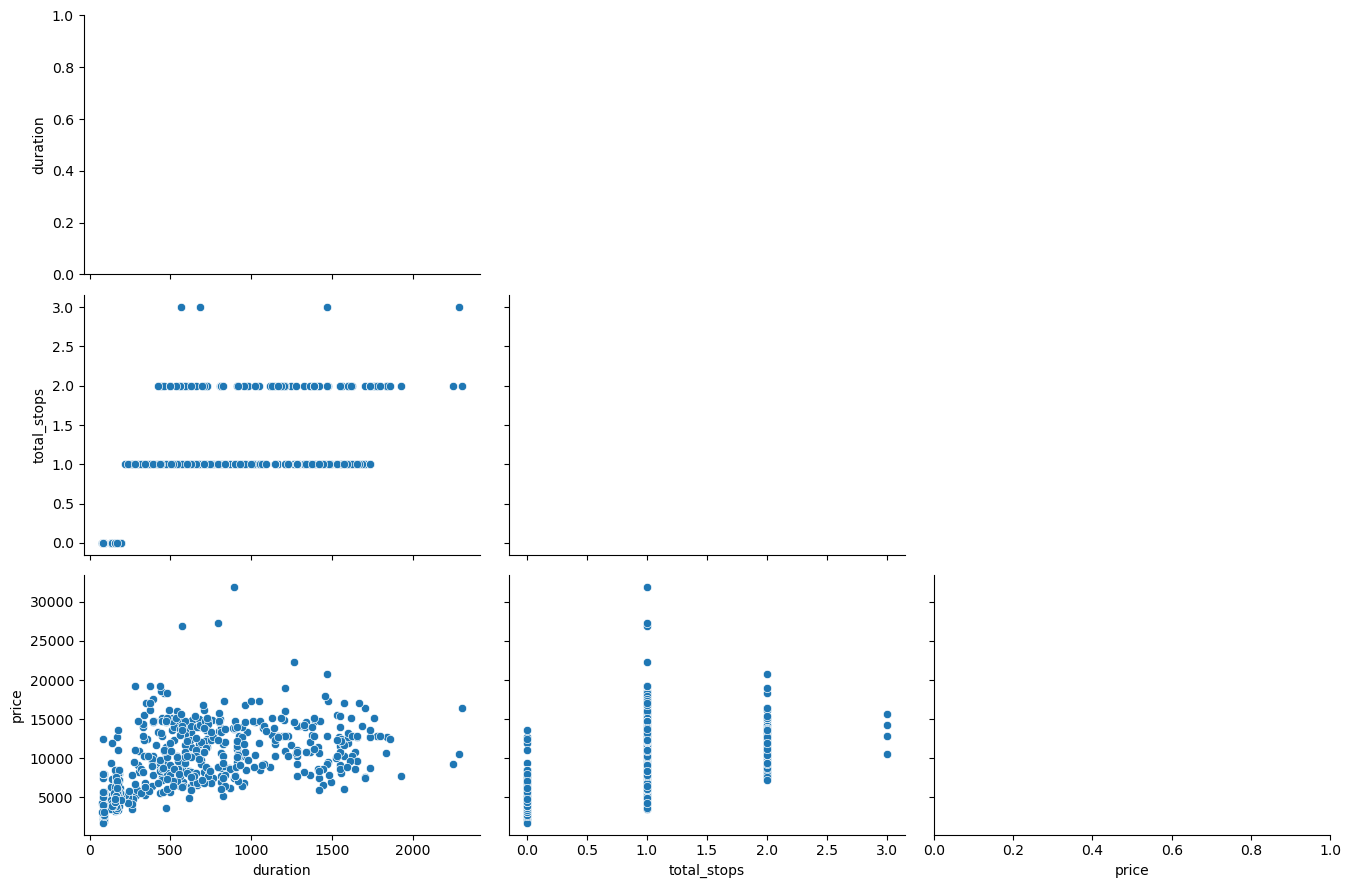

In [26]:
eda_helper_functions.pair_plots(train)

# 7. Correlation Analysis

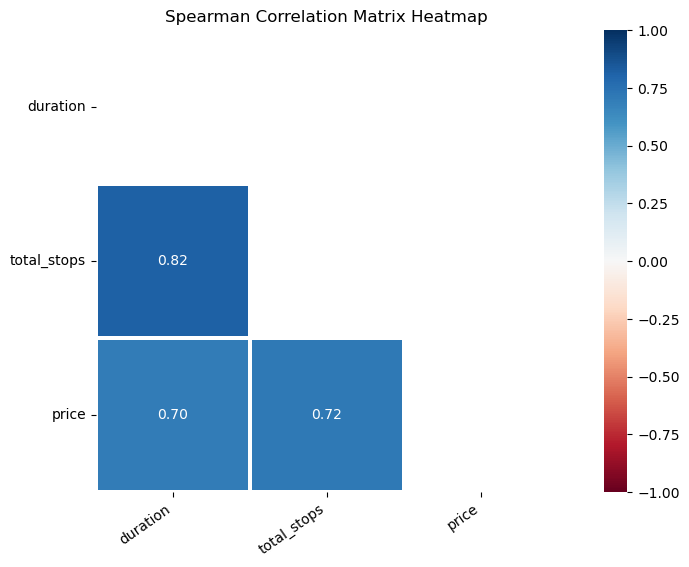

In [27]:
eda_helper_functions.correlation_heatmap(train)


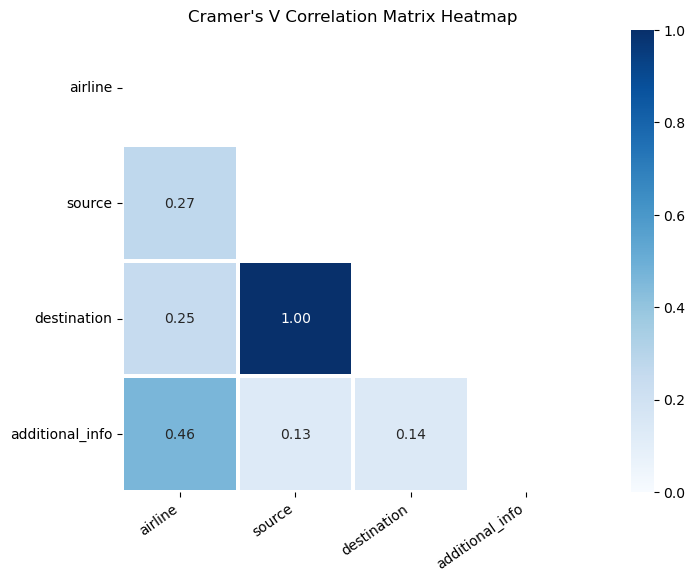

In [28]:
eda_helper_functions.cramersV_heatmap(train)

# 8. Detailed Analysis

In [29]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [30]:
# 8.1 airline

train.airline

0      Multiple Carriers
1      Multiple Carriers
2            Jet Airways
3            Jet Airways
4            Jet Airways
             ...        
635          Jet Airways
636          Jet Airways
637    Multiple Carriers
638            Air India
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [31]:
eda_helper_functions.cat_summary(train, "airline")

0      Multiple Carriers
1      Multiple Carriers
2            Jet Airways
3            Jet Airways
4            Jet Airways
             ...        
635          Jet Airways
636          Jet Airways
637    Multiple Carriers
638            Air India
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,234


,count,percentage
category,,
Jet Airways,234,0.365625
Indigo,127,0.198437
Air India,95,0.148438
Multiple Carriers,73,0.114062
Spicejet,48,0.075000
Vistara,30,0.046875
Air Asia,21,0.032813
Goair,12,0.018750


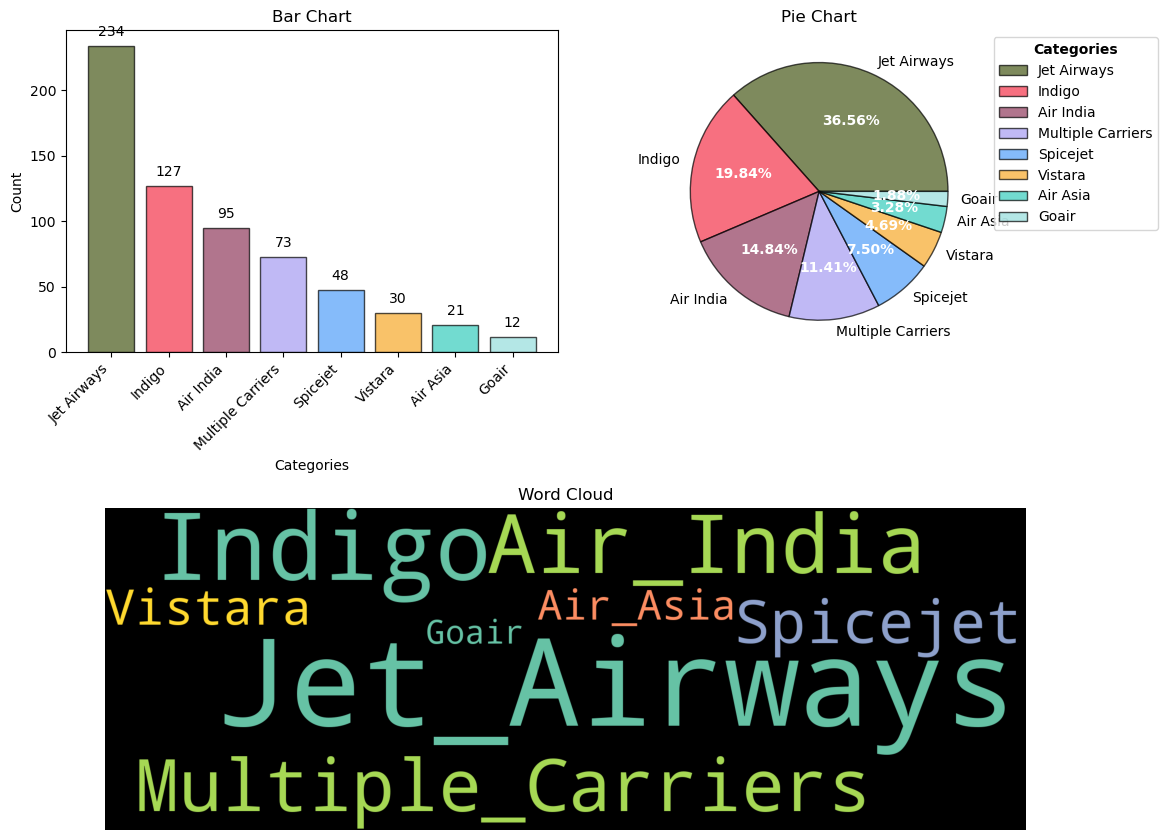

In [32]:
eda_helper_functions.cat_univar_plots(train, "airline")

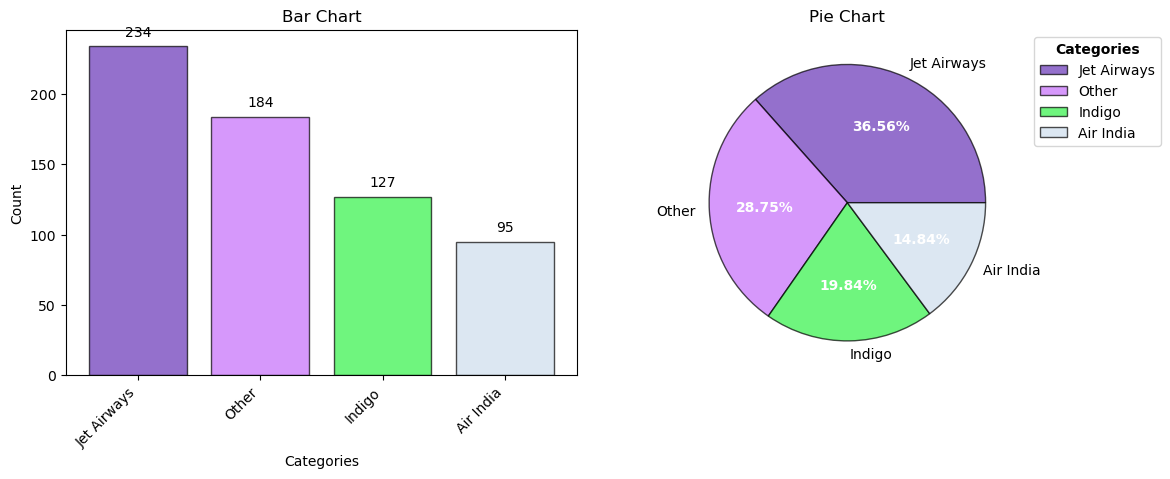

In [33]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)


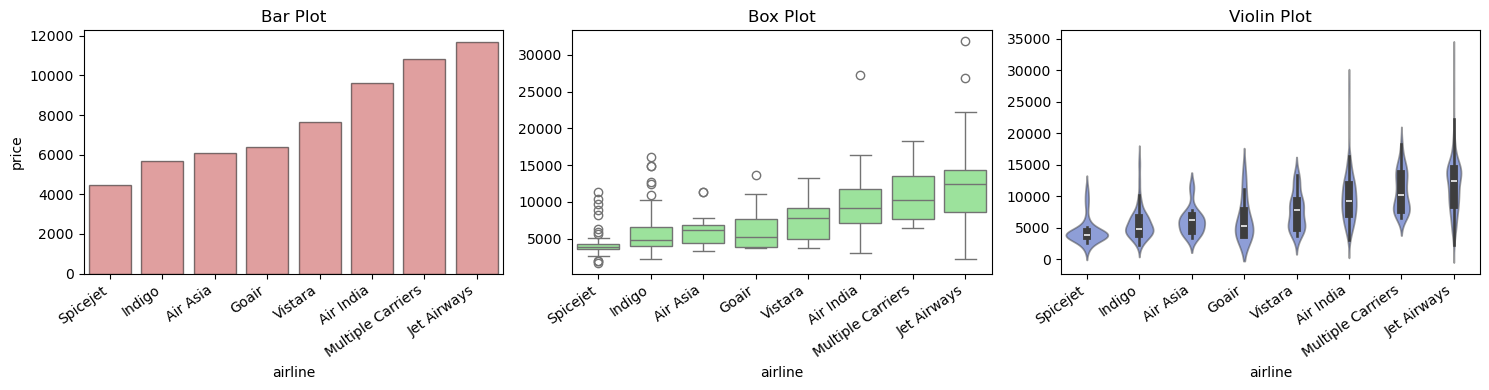

In [34]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [35]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 58.18421908070661
- p-value              : 2.882164960015268e-64
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 289.67263825287824
- p-value              : 9.694205556176917e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


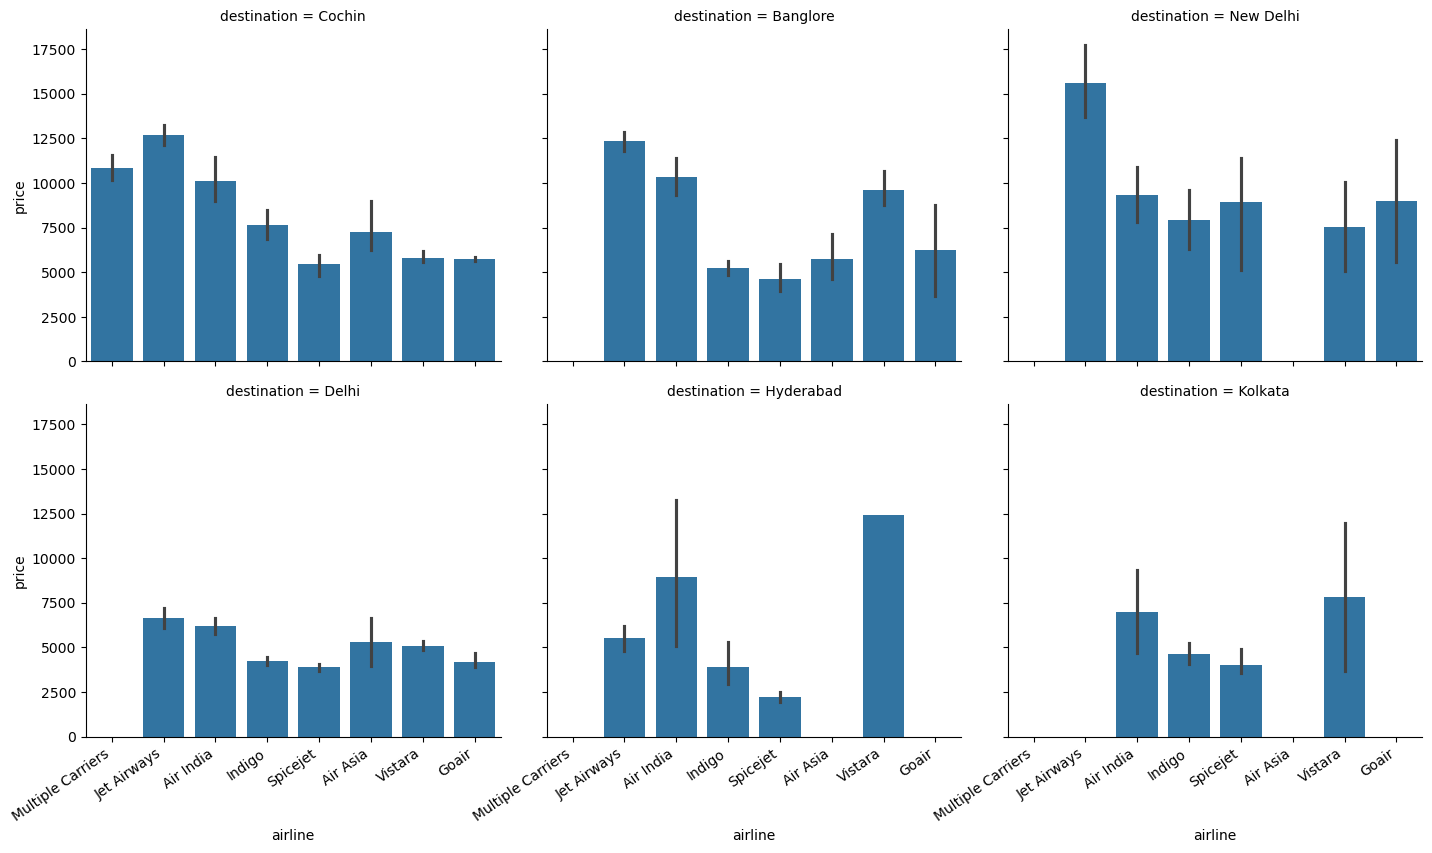

In [36]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

In [37]:
# 8.2 date_of_journey

train.date_of_journey

0     2019-03-27
1     2019-05-27
2     2019-04-01
3     2019-03-06
4     2019-05-21
         ...    
635   2019-06-12
636   2019-03-06
637   2019-06-03
638   2019-03-03
639   2019-03-09
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

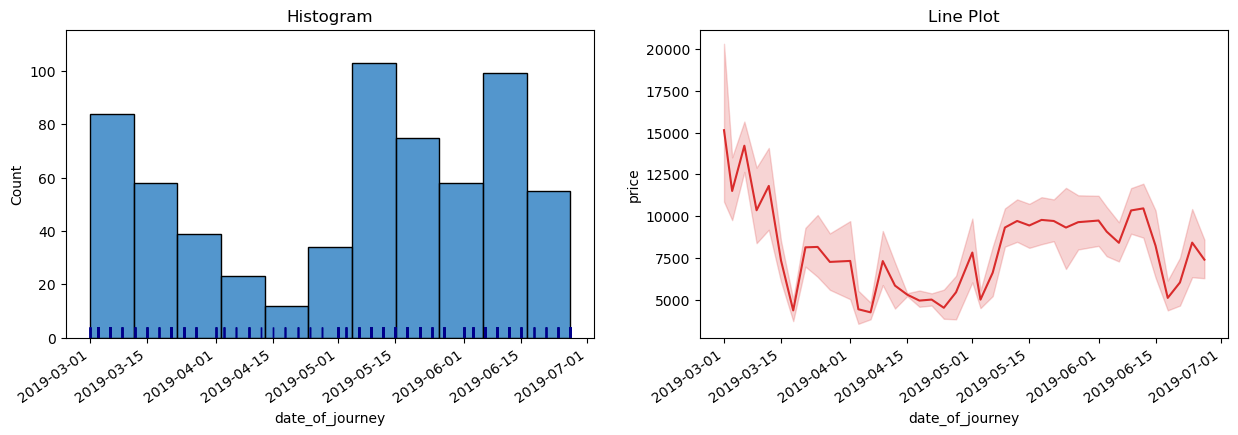

In [38]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

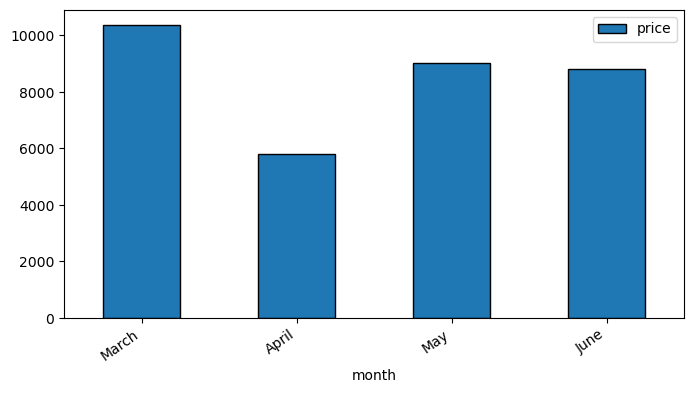

In [39]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

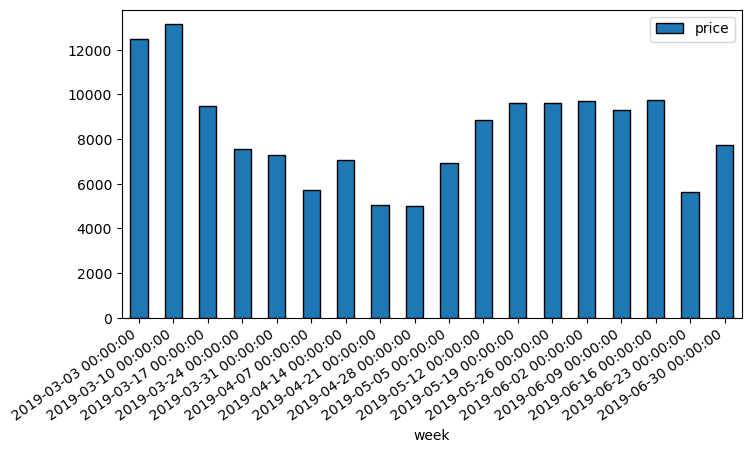

In [40]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

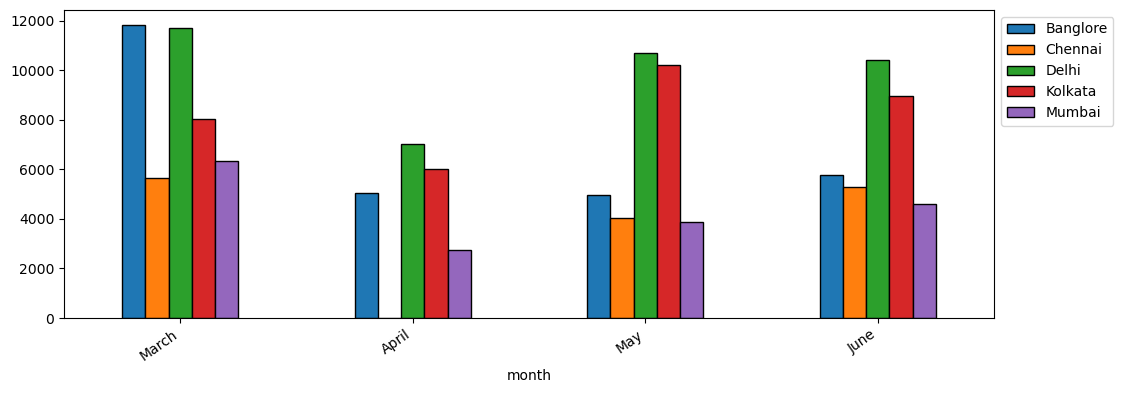

In [41]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

In [44]:
# 8.3 dep_time

train.dep_time

0     2025-07-07 08:55:00
1     2025-07-07 08:00:00
2     2025-07-07 20:00:00
3     2025-07-07 08:55:00
4     2025-07-07 10:20:00
              ...        
635   2025-07-07 09:00:00
636   2025-07-07 14:05:00
637   2025-07-07 10:35:00
638   2025-07-07 05:55:00
639   2025-07-07 05:45:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

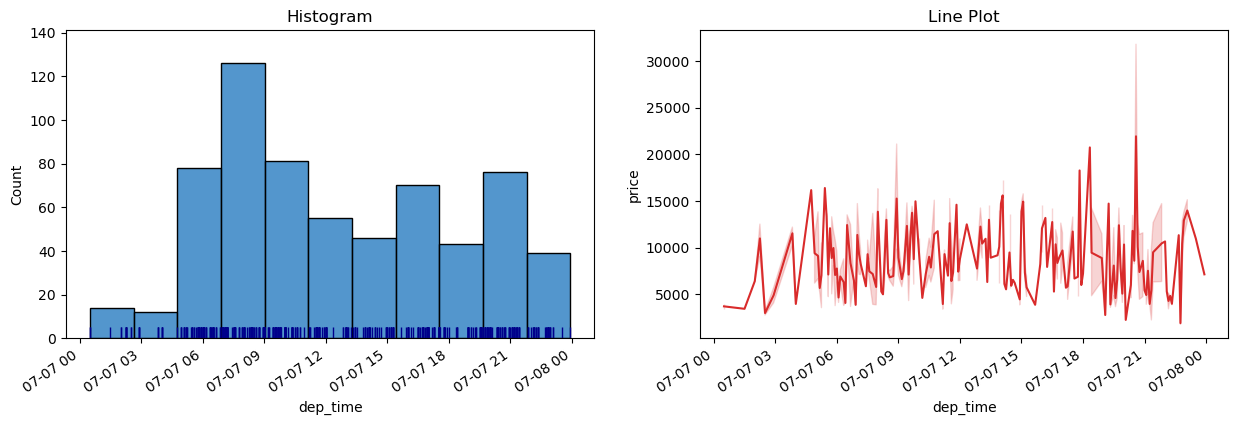

In [45]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")


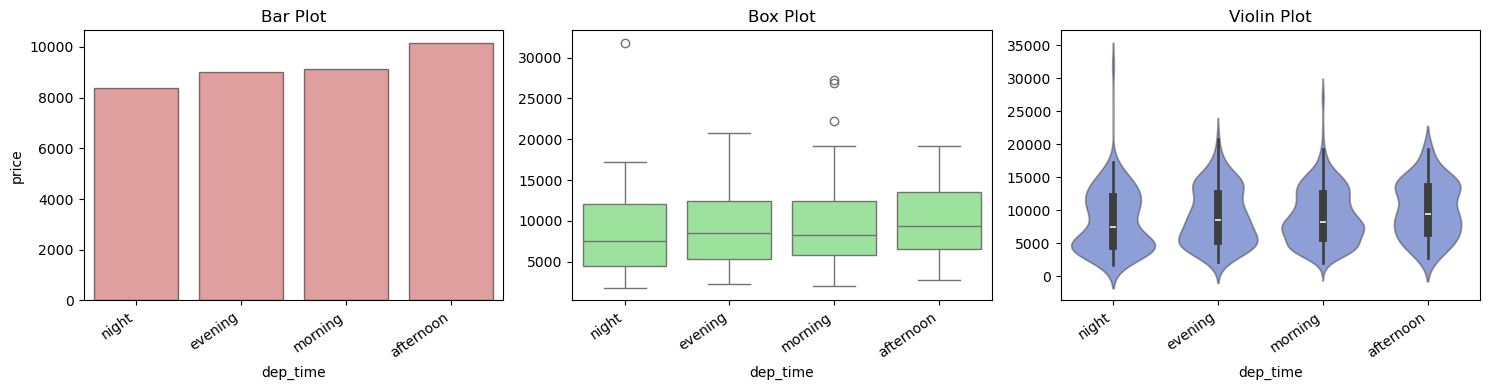

In [46]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

In [47]:
# 8.4 duration

train.duration

0       395
1       675
2      1655
3      1475
4       435
       ... 
635     600
636     435
637     505
638    1545
639     280
Name: duration, Length: 640, dtype: int64

In [48]:
eda_helper_functions.num_summary(train, "duration")


0       395
1       675
2      1655
3      1475
4       435
       ... 
635     600
636     435
637     505
638    1545
639     280
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,502.50
75,900.00
90,1426.50
95,1595.25
99,1816.35


,value
mean,615.914062
trimmed mean (5%),581.987847
trimmed mean (10%),551.855469
median,502.500000


,value
var,245143.724998
std,495.119910
IQR,730.000000
mad,337.500000
coef_variance,0.803878


,value
skewness,0.907561
kurtosis,-0.092535


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.682299948320033e-22
Test Statistic       : 0.881018719352221
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.980067500333462
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [49]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    502.5
0.75    900.0
Name: duration, dtype: float64

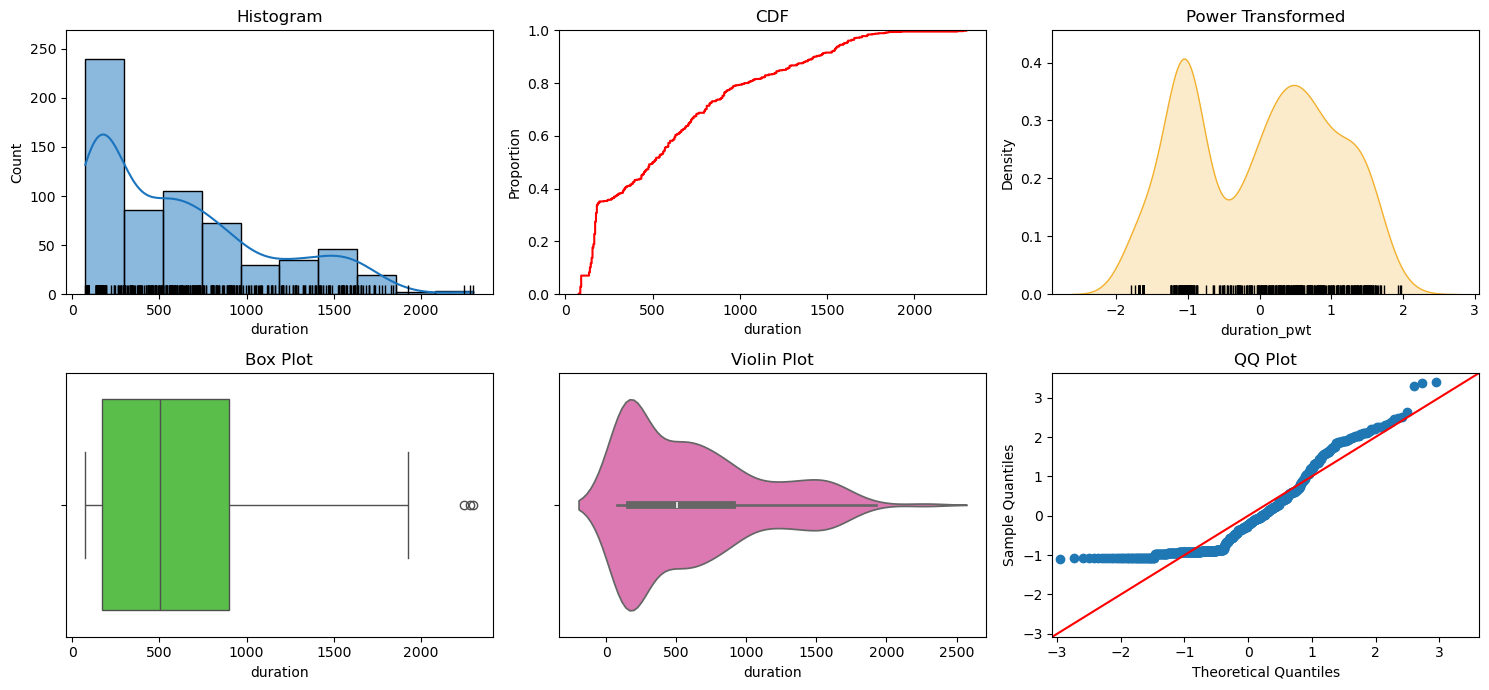

In [50]:
eda_helper_functions.num_univar_plots(train, "duration")


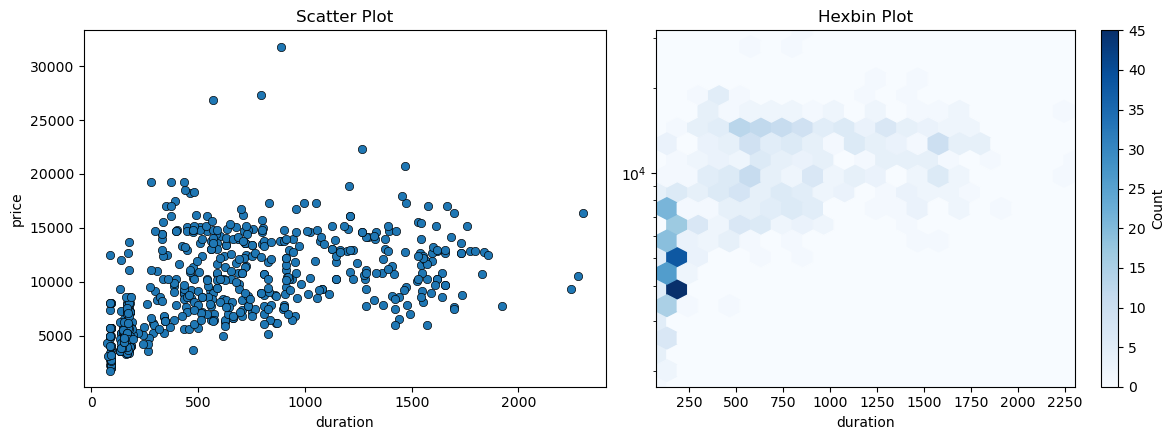

In [51]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [52]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5521123330625339
- p-value              : 2.4167235756800978e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.695572194691074
- p-value              : 1.0956923806609374e-93
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


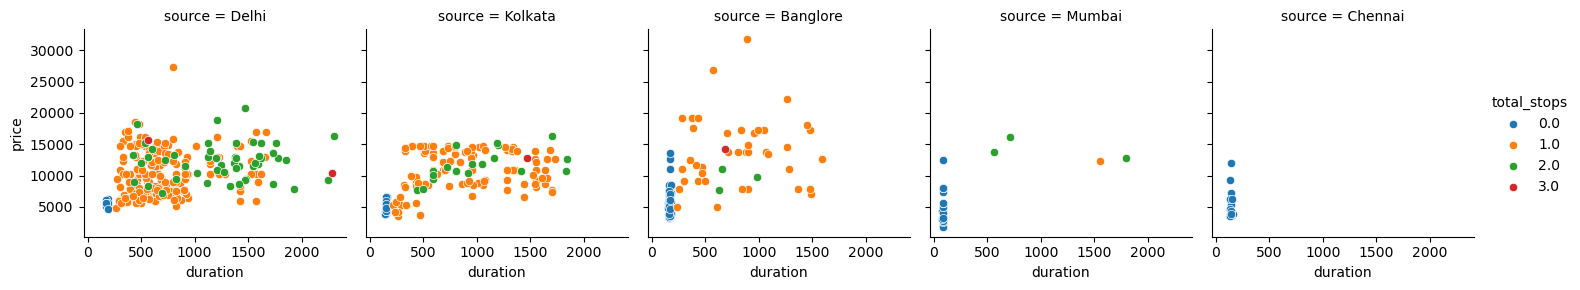

In [53]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

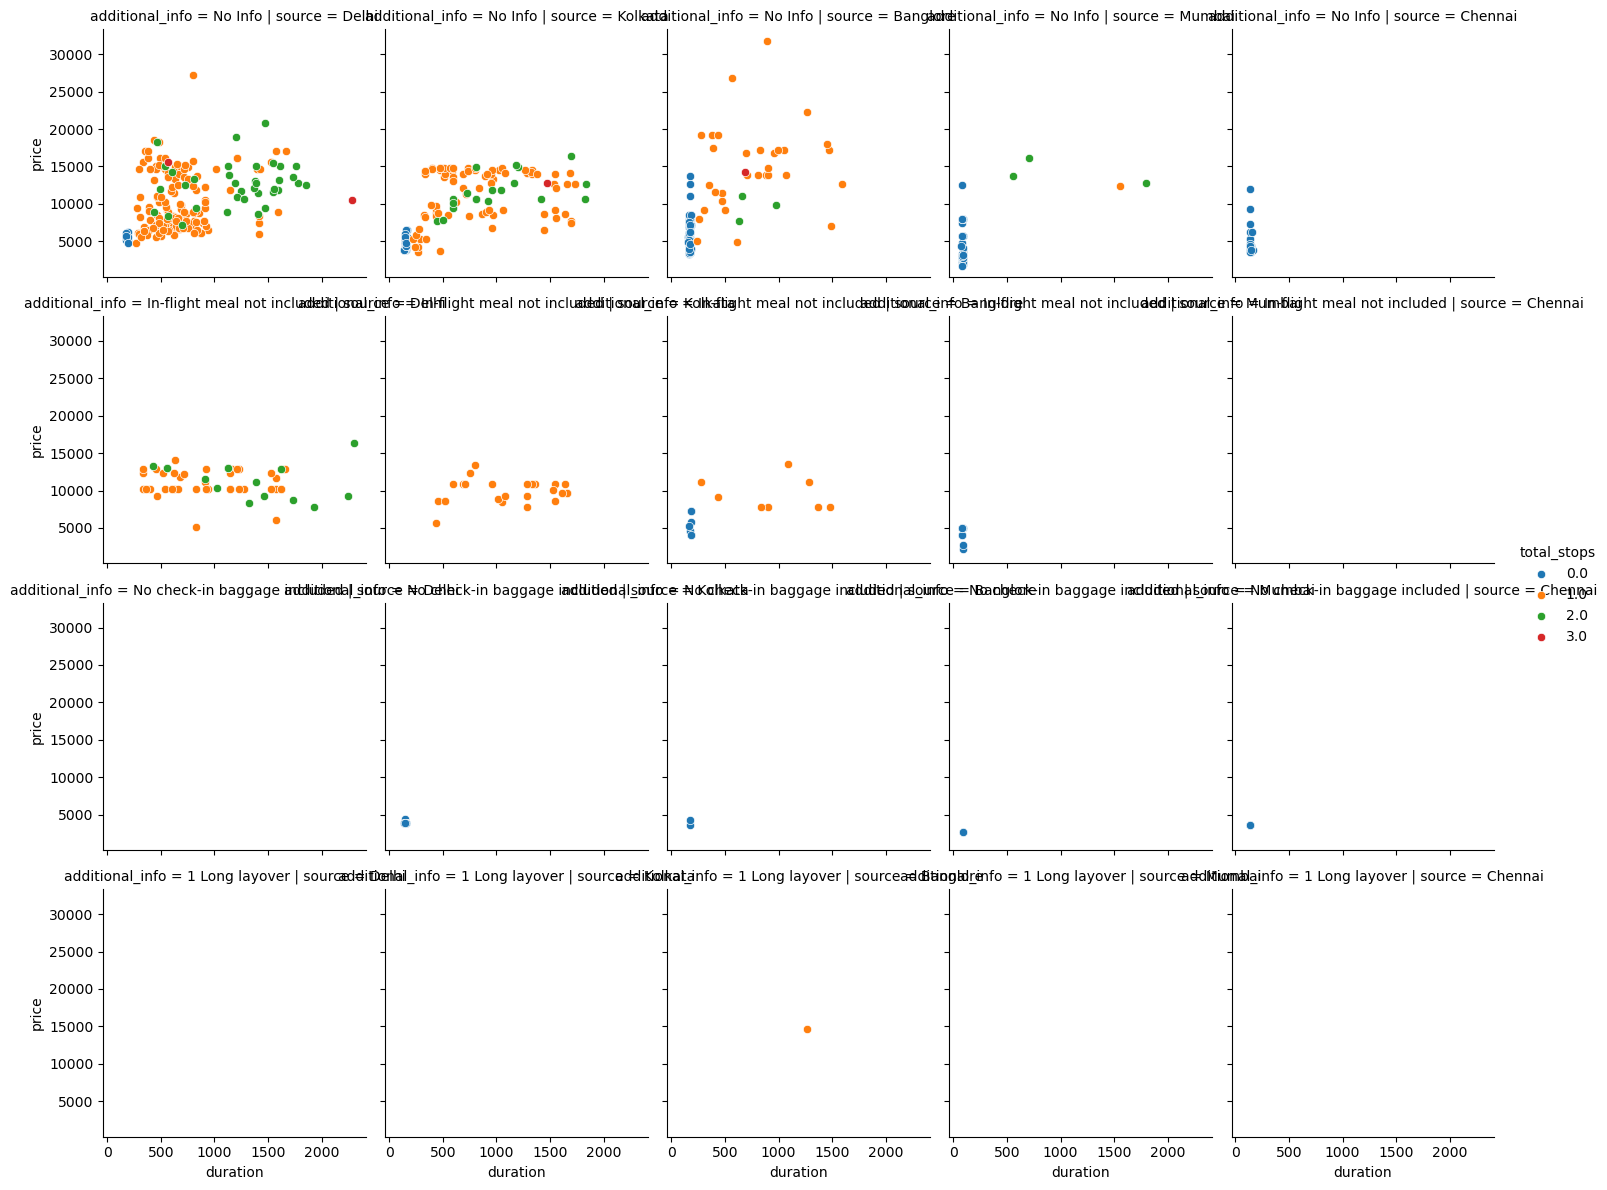

In [54]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [55]:
eda_helper_functions.get_iqr_outliers(train, "duration")


Lower Limit : -925.0
Upper Limit : 1995.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
568,Jet Airways,2019-03-27,Delhi,Cochin,2025-07-07 06:20:00,2025-07-07 19:45:00,2245,2.0,In-flight meal not included,9296
151,Air India,2019-06-24,Delhi,Cochin,2025-07-07 05:15:00,2025-07-07 19:15:00,2280,3.0,No Info,10493
507,Jet Airways,2019-03-06,Delhi,Cochin,2025-07-07 05:25:00,2025-07-07 19:45:00,2300,2.0,In-flight meal not included,16389


In [56]:
# 8.5 additional_info

eda_helper_functions.cat_summary(train, "additional_info")

0                          No Info
1      In-flight meal not included
2                          No Info
3                          No Info
4      In-flight meal not included
                  ...             
635    In-flight meal not included
636                        No Info
637                        No Info
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,514


,count,percentage
category,,
No Info,514,0.803125
In-flight meal not included,107,0.167187
No check-in baggage included,18,0.028125
1 Long layover,1,0.001563


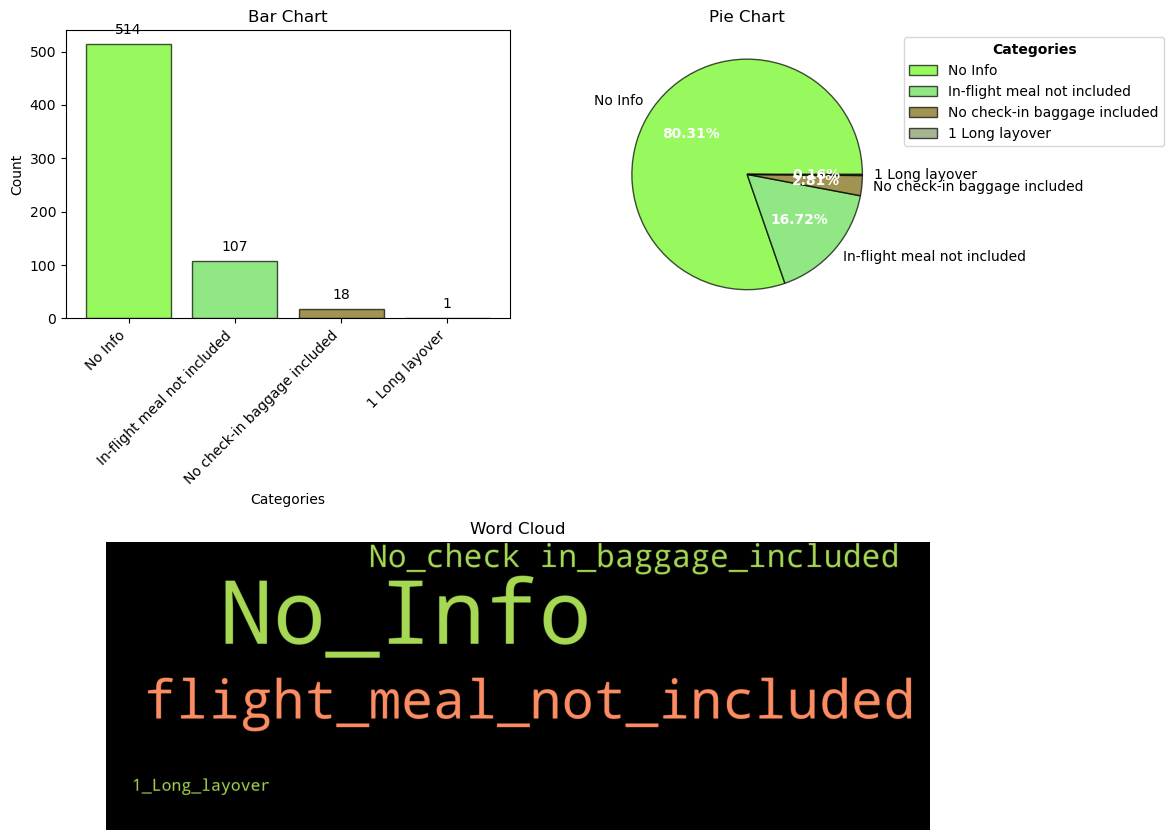

In [57]:
eda_helper_functions.cat_univar_plots(train, "additional_info")


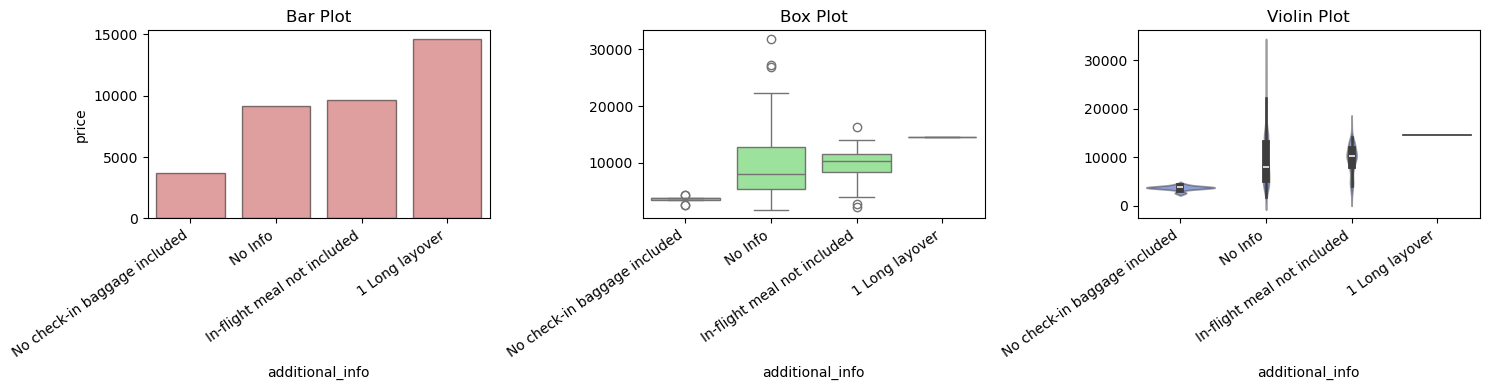

In [58]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")


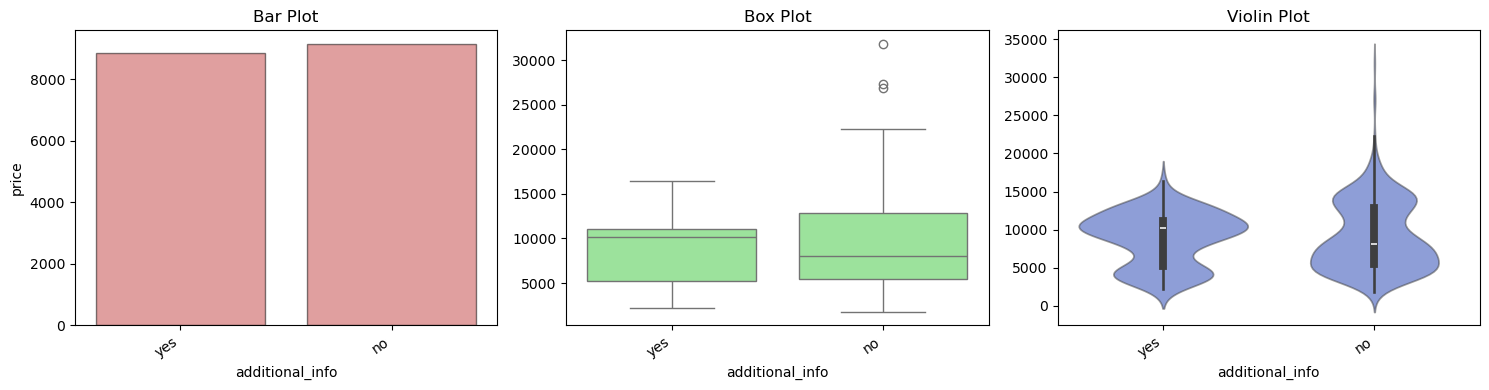

In [60]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)


# additional_info has severely rare categories
# Converted it into a binary feature for further analysis

In [ ]:
#9. Automated EDA